# **Experimento de Regresión**
- Similar al experimento de clasificasión, con 2 fases, una de entendimiento o ajuste y otra de validacón. El cambio importante está en la comparación ajuste por diferencia o distancia, ya no seré capaz de percibir números como tal, sino alejamientos para ver si el modelo está correctamente ajustado. - Todos los modelos de clasificacion tienen su homologo en regresión 
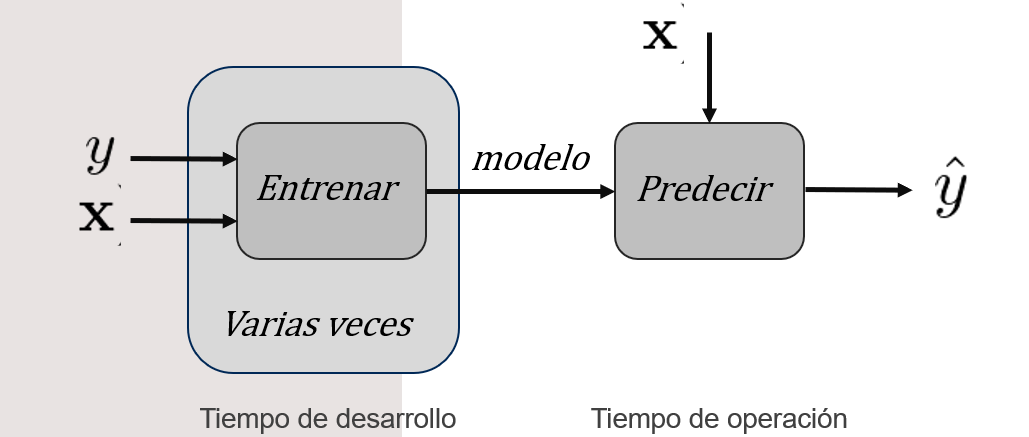
- más dificiles de ajustar precesamiente por las métricas de desempeño. 
- Aprendizage supervisado con y númerica (valor esperado del proceso).
- la y no la podemos encontrar de 2 formas :
    - Tabular: Una tabla que me indicará cada una de las variables, el problema de regresion es encontrar ese modelo que haga que esa y se vea en el comportamiento de las x. y~Xi 
    - Seriada: Un arreglo como vector, donde se tiene el valor de la y definida con datos como serie de tiempo. El problema cambia, ml siempre deben contar con variables x que definan a la y. Aqui no tenemos esas variables, es por eso que tendremos que crear las x.
    Va a depender de cómo tenga los datos 
- Empezamos a ajustar con los modelos más sencillos como (cómo cambian los modelos que ya conocemos)
    - Regresión líneal 
    - k vecinos más cercanos 
    - maquinas de soporte vectorial 
    - árboles de desición 
    - Modelos de ensamblaje 
    - MRA
- Qué empieza a cambiar en los modelos de entrenamiento:
    - tratamiento de nulos - Se mantiene 
    - Exploración de variables o caracteisticas - Se mantiene 
    - Separación en entrenamiento - valivación - Se mantiene 
    - Balanceo de y - NO se mantiene - nuestra variable no tiene escenarios, tiene valores, el balanceo aquí no es interesante.
    - Desempeño del modelo - Se mantiene - Pero va a cambiar mucho - Con diferentes medidas de desempeño 
- El modelo va a operar, y después se le va a pedir que haga un ciclo de retroalimentacion Machine Learning Operations
Escenario conjunto de proceso de data science. 
- También genera el pipeline del modelo, en clasificación llegamos hasta que el modelo está ajustado, ahora vamos a ver escenarios que nos permitan llevar ese modelo validado a funcionamiento con las primeras étapas de mlops. 


## **Medición del desempeño en regresión** 
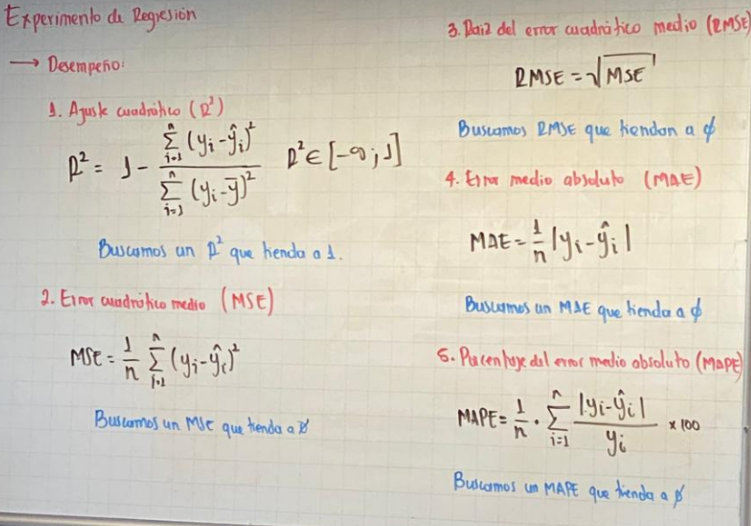
Sirven tanto para los problemas tabulares como para los de series. 

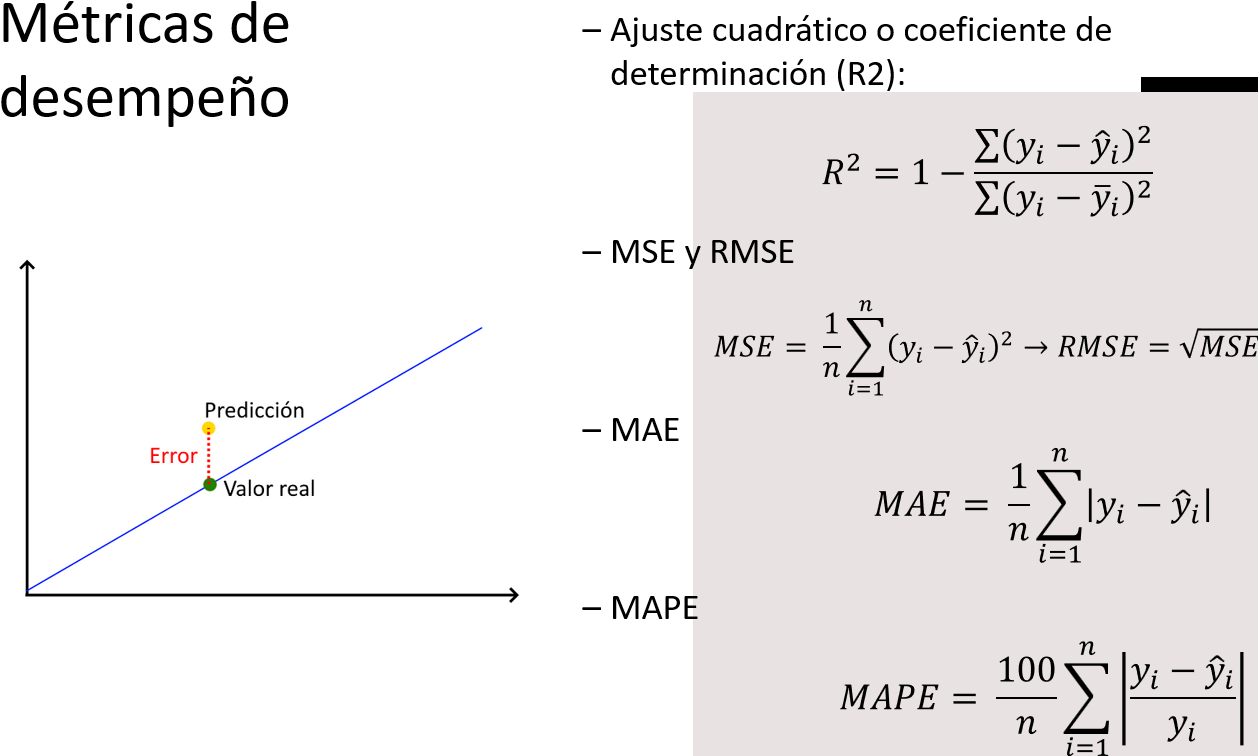
1. Ajuste Cuadrático (R^2):
    - R^2 = 1- (sum(yi-ýi)^2/sum(yi-ý)),  R^e[-inf,1] también puede dar negativo (no quiere decir que el modelo sea un mal modelo - solo que las variables x con las cuales fueron definidos los escenarios del suceso no están bien definidas- modelo que puede tender a fallar fácilmente)
    - Buscamos un R^2 que tienda a 1
    - qué tanto las predicciones se alejan del valor real y también del valor esperado de la y .
    - ý =E(y) es el valor esperado (valor que busco esperando a que mis sucesos ocurran casi siempre calculado como la media de y)
2. El error cuadático medio (MSE)
    - MSE=1/n.sum(yi-ý)^2 , buscamos que tienda a 0
    - Lo que hace es dividir por la cantidad de muestras y multiplica por las diferencias cuadáticas (sumar y promedia)
    - Dá resultados en cuadrados, osea que es un rango sobre el cual la variable sucede, es un poco complejo de entender, pues es un rango esférico.   
3. Raiz del error cuadrático medio (RMSE)
    - RMSE= sqrt(MSE), buscamos que tiendan a 0
4. Error medio absoluto (MAE) - para métricas de velocidad 
    - MAE=1/n. abs(yi-ýi), buscamos que tienda a 0. 
5. Porcentaje del error medio absoluto (MAPE)
    - MAPE= 1/n.sum(abs()), qué tanto se está separando el valor de sus predicciones al valor real, muchas veces lo multiplican por 100.
    - Buscamos que tienda a 0, ya que es error 
    - Si se quiere mirar probabilidad 1- MAPE, osea predecir correctamente 


## **1. Entendimiento del problema**
Garments Industry es una compañía del sector textil con muchas actividades manuales. Su éxito está en que las prendas son "hechas a mnao", por lo que medir la productividad de sus empleados se vuelve esencial para mejorar las utilidades de la organización. Es por esto que la compañía quiere estimar los niveles de productividad de sus empleados para mejorar la operación y mantener los ingresos esperados, además, identificar herramientas para mejorar el día a día de sus empleados.


## **2. Enfoque Analítico**
Construir un modelo de regresión para predecir la productividad de cada empleado con un MAPE menor al 20% (probabilidad superior al 80%)

## **3. Requerimiento de Datos**
- Se requieren datos del trabajador en su puesto de trabajo partícular
- Se requieren mediciones del puesto de tabajo (tiempos, cantidad de prendas, momentos de ocio, cantidad de personas)
- Se requiere una medición inicial de la productividad


## **4. Recolección de datos**

- date: Fecha de medición de la productividad.
- quarter: Trimestre de la medición.
- department: Área de trabajo en particular.
- day: Nombre del día en el que se hizo la medición.
- team: Número del equipo de trabajo.
- target _productivity: Productividad objetivo del área de trabajo.
- smv: Valor de tiempo estándar en minutos de la actividad.
- wip: Cantidad de trabajo en proceso (unidades).
- over_time: Tiempo en general de operación 
- incentive: procentaje de incentivos al área de trabajo 
- idle_time: tiempo de parada , ejem. cuato tiempo estuvo tiempo específicamente en ese día 
- idle_mean: Cantidad de trabajadores quietos en el tiempo de parada 
- no_of_style_change: Cantidad total de cambios de estilos en la producción
- no_of_workers: cantidad total de trabajadores
- actual_productivity: Productividad actual - Será nuestra y 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##Importación de los datos
data = pd.read_csv('garments_worker_productivity.csv')
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
data.info()
#tenemos más de 1000 datos, con 15 columnas identíficadas con obj, flotantes, e int. Hay datos nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## **5. Entendimiento de los datos**
- Conocer nuestra variable y (escencial ya que es lo que le va a decir al modelo los datos que quiero que se aprenda )
- identíficar datos nulos 
- Análisis univariado y multivariado 

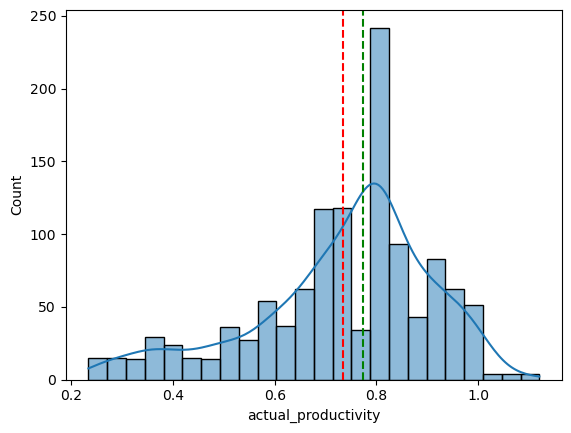

In [3]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.histplot(data=data, x='actual_productivity', kde=True)
plt.axvline(x=data.actual_productivity.mean(), color='red', linestyle= 'dashed')
plt.axvline(x=data.actual_productivity.median(), color='green', linestyle='dashed')
plt.show()
#áreas donla la productividad es menor al 20 % y mayor al 20%
# la mediana y la media son cercanas, ahí hay una mayor frec del 80%
#Es normal - mejor- alrededor de la media está la maypría de los individuos en nuestro problema - es muy dificil que siempre sea normal 

La ley de los grandes números: La media de la muestra va a tender a la media de la población. 
Se va a utilizar las colas como los errores- Lo que esperamos en el modelo de regresión . Va a identíficar bien la media pero unas colas de error más grandes significa que el modelo se va a ajustar peor.

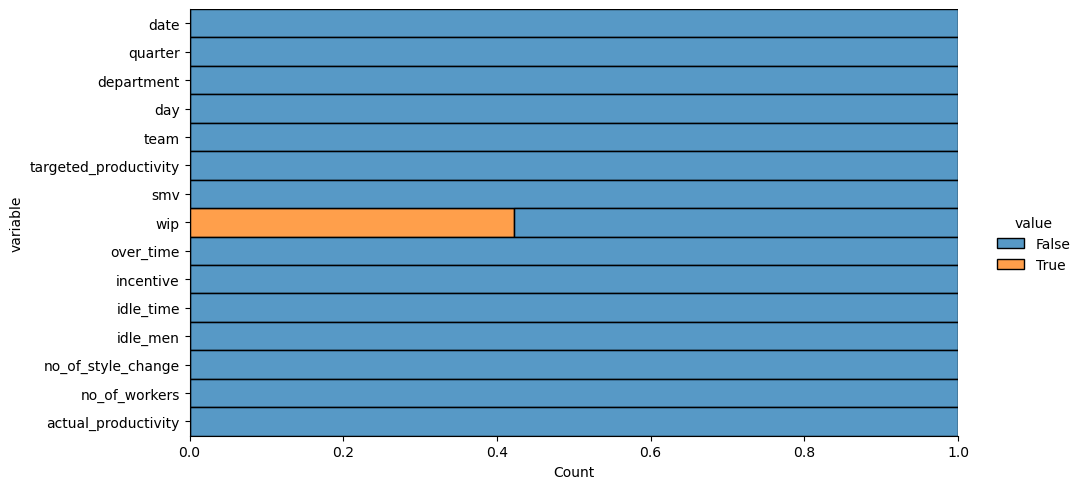

In [ ]:
#datos nulos
data.isnull().melt().pipe(lambda df: sb.displot(data=df, y='variable', hue='value',multiple='fill',aspect=2))
plt.show()    
#estádisticamente esa variable con muchos nulos se deberías eliminar, pero nos dice mucho en el problema

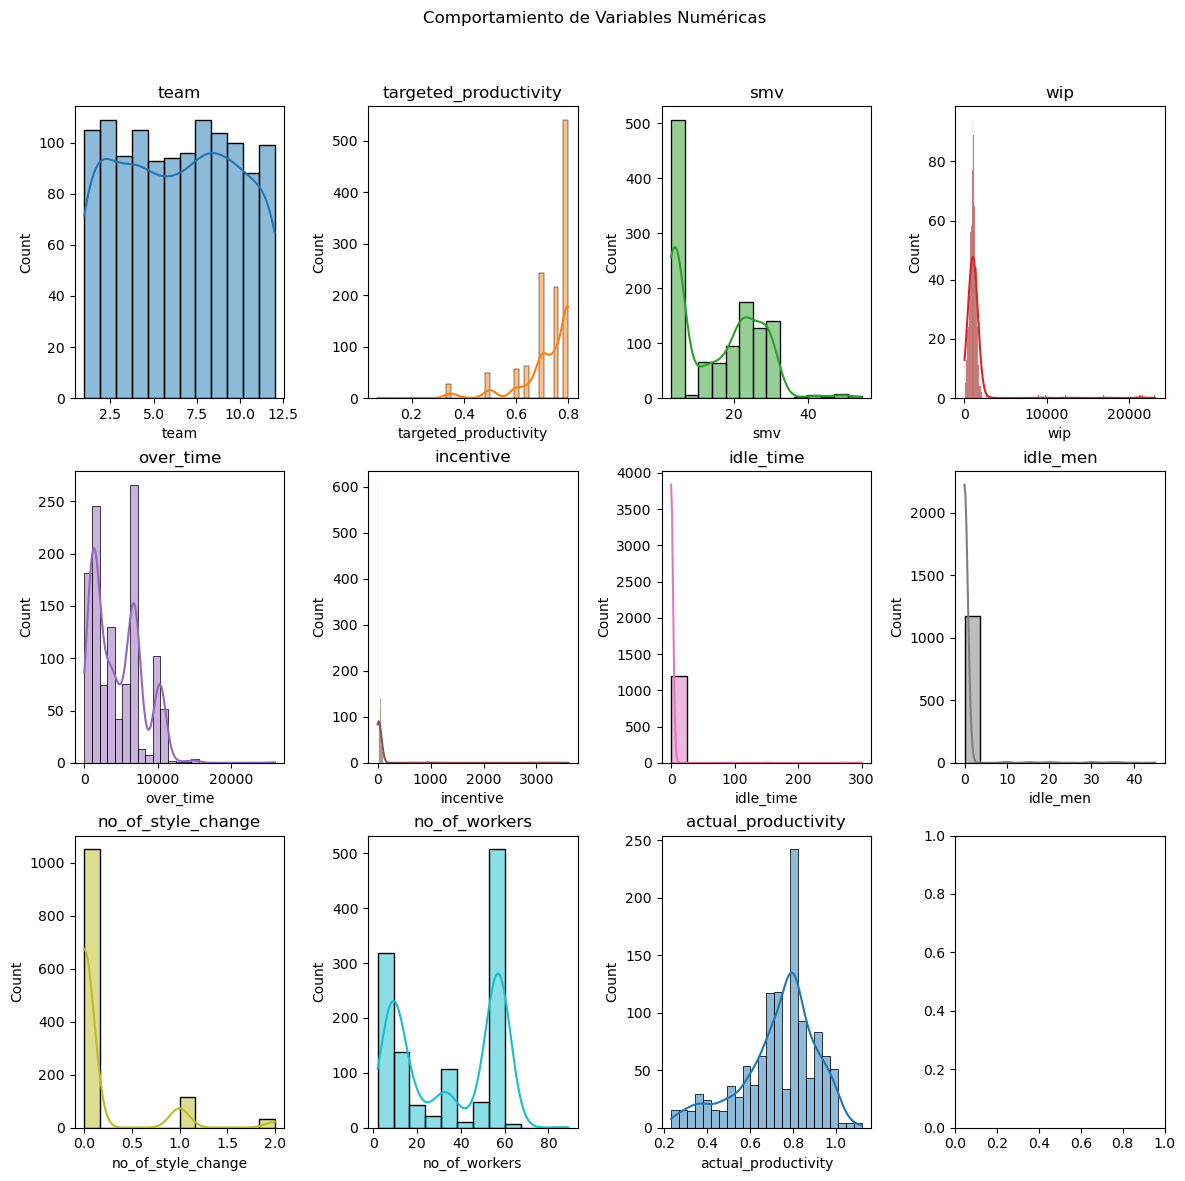

In [7]:
#histograma de frecuencias variables númericas 
fig, ax = plt.subplots(3,4, figsize=(12,12))
ax = ax.flat
num_col=data.select_dtypes(include=['int64','float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

### Tarea: traer variables categoricas y proceso de imputacion de datos listo 
### Además el profesor estaba hablando de que actualmente no existe pero se está trabajando en modelos de ml que sepan trabajar con datos nulos, esto para que no se tenga que hacer tratamiento de datos --> me parece inportante ya que en tecnicas de sec se trabaja con muchos datos herrados o nulos en algunos casos --> ver como poner esto en tesis (buscar más)